# Problem statement:

Normal life can be stressful, and people need to relax. Being entertained by others is a wonderful way to take some time out of life. It can reduce stress and make life's issues easier to face. The media and entertainment industry consists of film, television, radio and print. These segments include movies, TV shows, radio shows, news, music, newspapers, magazines, and books. The entertainment industry is a group of sub-industries devoted to entertainment. The entertainment industry is used to describe the mass media companies that control the distribution and manufacture of mass media entertainment.

# Importing libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates
from datetime import datetime

# Getting and cleaning Data Sets

In [89]:
basic_info_df=pd.read_excel(r"C:\Users\slowd\OneDrive\Desktop\Projects\unified_mentor\Entertainer Data Analysis\Entertainer - Basic Info.xlsx")
Breakthrough_df=pd.read_excel(r"C:\Users\slowd\OneDrive\Desktop\Projects\unified_mentor\Entertainer Data Analysis\Entertainer - Breakthrough Info.xlsx")
Last_work_df=pd.read_excel(r"C:\Users\slowd\OneDrive\Desktop\Projects\unified_mentor\Entertainer Data Analysis\Entertainer - Last work Info.xlsx")


Cleaning Data

In [90]:
basic_info_df.head()

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [91]:
Breakthrough_df.head()

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


In [92]:
Last_work_df.head()

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN


In [93]:
nullvals=basic_info_df.isnull().sum()
nullvals

Entertainer             0
Gender (traditional)    0
Birth Year              0
dtype: int64

In [94]:
nullvals=Breakthrough_df.isnull().sum()
nullvals
#Year of First Oscar/Grammy/Emmy may have null values

Entertainer                                     0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 6
dtype: int64

In [95]:
nullvals=Last_work_df.isnull().sum()
nullvals
#Year of Death may have null values

Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64

## Changing row names to more convinient row names

In [96]:
basic_info_df=basic_info_df.sort_values("Entertainer")
basic_info_df.drop_duplicates()

df1=basic_info_df.rename(columns= {"Entertainer" : "Name",
                                   "Gender (traditional)" : "Sex",
                                   "Birth Year": "Birth_Year"})
df1.head()

,Name,Sex,Birth_Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922


In [97]:
Breakthrough_df=Breakthrough_df.sort_values("Entertainer")
Breakthrough_df.drop_duplicates()
df2=Breakthrough_df.rename(columns= {"Entertainer" : "Name",
                                   "Year of Breakthrough/#1 Hit/Award Nomination" : "First_Hit(Year)",
                                   "Breakthrough Name": "Hit_Name",
                                   "Year of First Oscar/Grammy/Emmy": "First_Award(Year)"})

df2.head()


,Name,First_Hit(Year),Hit_Name,First_Award(Year)
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0


In [98]:
current_year=2023
Last_work_df=Last_work_df.sort_values("Entertainer")
Last_work_df.drop_duplicates()
df3=Last_work_df.rename(columns= {"Entertainer" : "Name",
                                   "Year of Last Major Work (arguable)" : "Last_Work(Year)",
                                   "Year of Death": "Death_Year/Current_Year"})
df3["Death_Year/Current_Year"]=df3['Death_Year/Current_Year'].fillna(current_year)
df3.head()

,Name,Last_Work(Year),Death_Year/Current_Year
0,Adele,2016,2023.0
1,Angelina Jolie,2016,2023.0
2,Aretha Franklin,2014,2023.0
3,Bette Davis,1989,1989.0
4,Betty White,2016,2023.0


## Merging datasets to perform analysis

In [99]:
df = pd.merge(df1, df2, on='Name')
df = pd.merge(df, df3, on='Name')
df.head()

,Name,Sex,Birth_Year,First_Hit(Year),Hit_Name,First_Award(Year),Last_Work(Year),Death_Year/Current_Year
0,Adele,F,1988,2008,19,2009.0,2016,2023.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2023.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2023.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2023.0


## Adding some required columns to dataframe for analysis

In [100]:
df['First_Hit(Age)'] = df['First_Hit(Year)'] - df['Birth_Year']
df['First_Award(Age)'] = df['First_Award(Year)'] - df['Birth_Year']
df['Career Duration'] = df['Last_Work(Year)'] - df['First_Hit(Year)']
df['Lifetime(Till Death/Till Date)'] = df['Death_Year/Current_Year'] - df['Birth_Year']
df.head()

,Name,Sex,Birth_Year,First_Hit(Year),Hit_Name,First_Award(Year),Last_Work(Year),Death_Year/Current_Year,First_Hit(Age),First_Award(Age),Career Duration,Lifetime(Till Death/Till Date)
0,Adele,F,1988,2008,19,2009.0,2016,2023.0,20,21.0,8,35.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2023.0,24,24.0,17,48.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2023.0,25,26.0,47,81.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,26,27.0,55,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2023.0,30,54.0,64,101.0


# Analysis

## Comparing general break through ages and first award ages

In [101]:
df_ages = df[['Name', 'First_Hit(Age)', 'First_Award(Age)']]
df_career = df[['Name', 'Career Duration', 'Lifetime(Till Death/Till Date)']]
df_ages.head(),df_career.head()


(              Name  First_Hit(Age)  First_Award(Age)
 0            Adele              20              21.0
 1   Angelina Jolie              24              24.0
 2  Aretha Franklin              25              26.0
 3      Bette Davis              26              27.0
 4      Betty White              30              54.0,
               Name  Career Duration  Lifetime(Till Death/Till Date)
 0            Adele                8                            35.0
 1   Angelina Jolie               17                            48.0
 2  Aretha Franklin               47                            81.0
 3      Bette Davis               55                            81.0
 4      Betty White               64                           101.0)

<Figure size 1000x600 with 0 Axes>

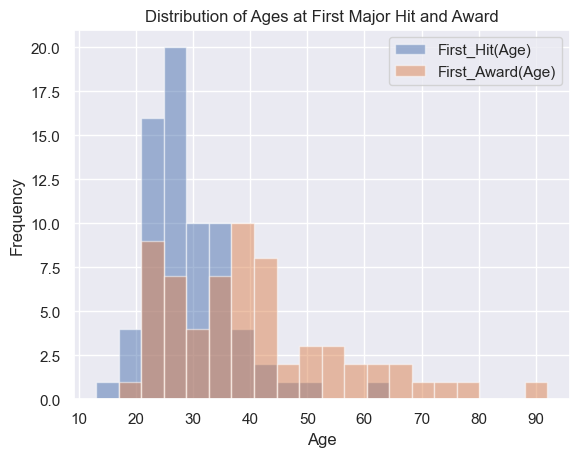

In [102]:
plt.figure(figsize=(10, 6))
df_ages[['First_Hit(Age)', 'First_Award(Age)']].plot(kind='hist', alpha=0.5, bins=20)
plt.title('Distribution of Ages at First Major Hit and Award')
plt.xlabel('Age')
plt.show()

From the given Dataset it is understood that most Entertainers get have their first major hit between the ages 20-30 and Generally win awards in the range of ages 20-40

## Now we look at the population

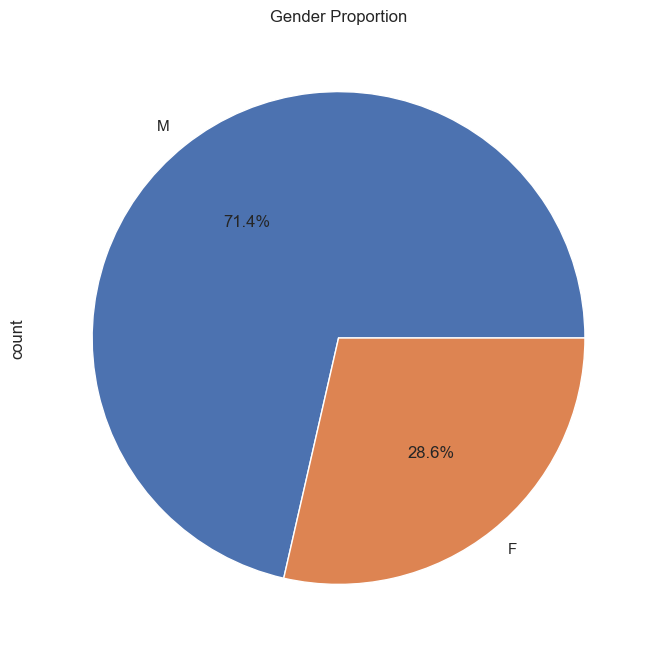

In [103]:
plt.figure(figsize=(8, 8))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Proportion')
plt.show()

Here let us take a look at the male female proportion of the dataset. 

It is visible that 28.6 percent of Entertainers are women in the Entertainment industry according to this dataset

## A gender based comparision of ages at first hit and first award

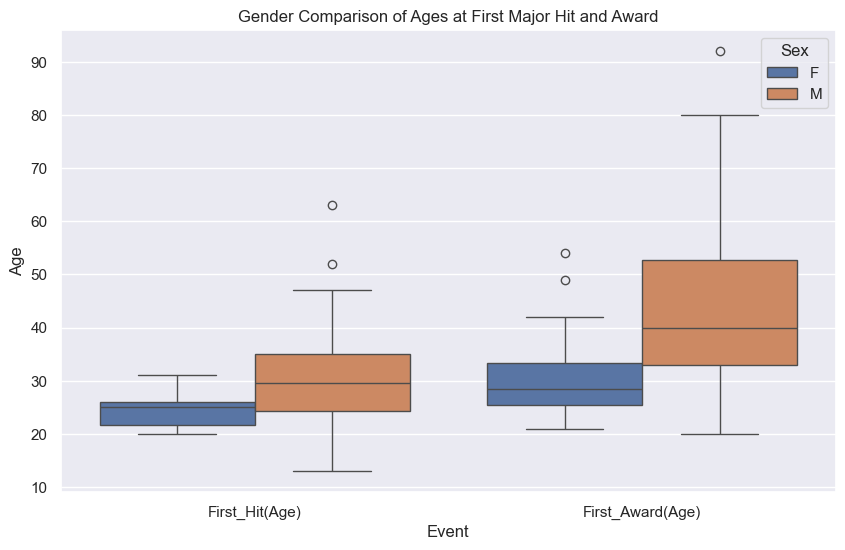

In [104]:
df_ages_melted = df.melt(id_vars=['Name', 'Sex'], value_vars=['First_Hit(Age)', 'First_Award(Age)'], var_name='Event', value_name='Age')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Event', y='Age', hue='Sex', data=df_ages_melted)
plt.title('Gender Comparison of Ages at First Major Hit and Award')
plt.show()

It is observed that women seem to have their first hit at the age range of early to late 20s wheras for men this range is from mid 20s to mid 30s

Women also win awards earlier then men which is between the age range of mid 20s to mid 30s the difference is quite stark when compared to men who seem star winning awards at the ages ranging from mid 30s to early 50s

## Finding top actors

Ranking based upon age difference of first hit and first award and age at first hit

In [105]:
df_grp_hist = df[['Name','First_Award(Age)','First_Hit(Age)']]
df_grp_hist['Age_Difference'] = df['First_Award(Age)'] - df['First_Hit(Age)']
df_grp_hist=df_grp_hist[df_grp_hist['Age_Difference']>=0]
df_grp_hist = df_grp_hist.sort_values(by=['Age_Difference','First_Hit(Age)']).head(10)
df_grp_hist['Rank'] = np.arange(1, 11)
df_grp_hist


,Name,First_Award(Age),First_Hit(Age),Age_Difference,Rank
1,Angelina Jolie,24.0,24,0.0,1
42,Katherine Hepburn,26.0,26,0.0,2
13,Clark Gable,33.0,33,0.0,3
16,Denzel Washington,35.0,35,0.0,4
0,Adele,21.0,20,1.0,5
50,Mariah Carey,22.0,21,1.0,6
2,Aretha Franklin,26.0,25,1.0,7
3,Bette Davis,27.0,26,1.0,8
69,Willie Nelson,43.0,42,1.0,9
57,Paul McCartney,23.0,21,2.0,10


## Doing a comparision

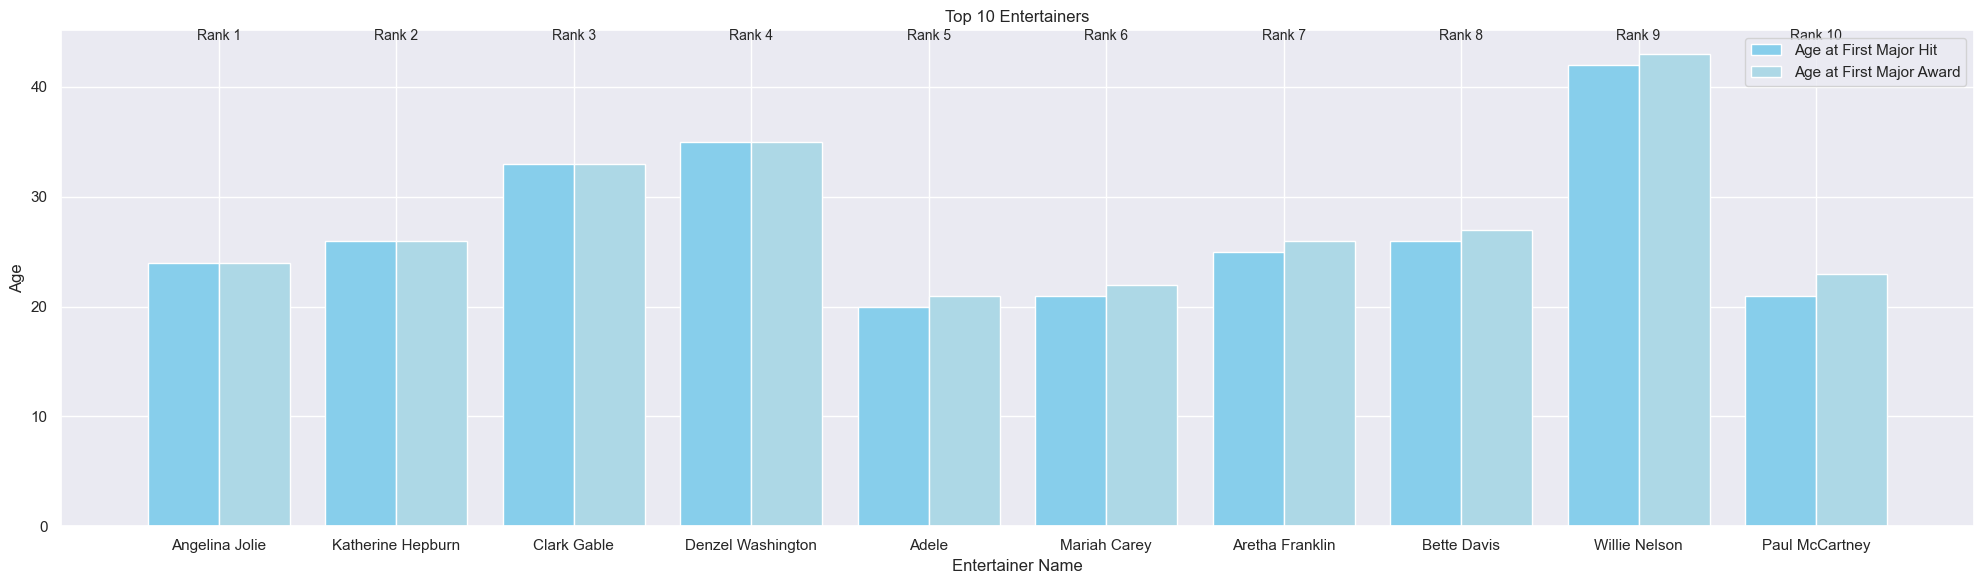

In [106]:
plt.figure(figsize=(20, 6))

bar_width = 0.4
index = np.arange(len(df_grp_hist))

# Plot bars for Age at First Major Hit
plt.bar(index, df_grp_hist['First_Hit(Age)'], width=bar_width, color='skyblue', label='Age at First Major Hit')
# Plot bars for Age at First Major Award
plt.bar(index + bar_width, df_grp_hist['First_Award(Age)'], width=bar_width, color='lightblue', label='Age at First Major Award')

for i, (name, rank) in enumerate(zip(df_grp_hist['Name'], df_grp_hist['Rank'])):
    plt.text(i + bar_width/2, df_grp_hist['First_Award(Age)'].max() + 1, f'Rank {rank}', ha='center', va='bottom', fontsize=10)


plt.xlabel('Entertainer Name')
plt.ylabel('Age')
plt.title('Top 10 Entertainers')
plt.xticks(index + bar_width / 2, df_grp_hist['Name'])
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
df.head()

,Name,Sex,Birth_Year,First_Hit(Year),Hit_Name,First_Award(Year),Last_Work(Year),Death_Year/Current_Year,First_Hit(Age),First_Award(Age),Career Duration,Lifetime(Till Death/Till Date)
0,Adele,F,1988,2008,19,2009.0,2016,2023.0,20,21.0,8,35.0
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,2023.0,24,24.0,17,48.0
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,2023.0,25,26.0,47,81.0
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,26,27.0,55,81.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,2023.0,30,54.0,64,101.0


Here the ranking is Left(First) to right(tenth)

Here the sorting first done on the basis of difference in age from their first hit to first award and the based upon their age when they had their first hit

Here Angelina Joli is first. She had her first hit at the age of 24 and won a major award in the same year. Katherine Hepburn also has won a major in the same year as the her first hit, yet she falls second due to the fact that her first hit was when she was at age 26

Here having won a major award in the same year as having a hit holds priority over having had a major hit earlier as it is noticable in case of Adele who had her first hit at the age of 20 but won a major award at age 21 resulting in a 1 year gap which caused her to fall 5th place

## Calculating based on era

In [108]:
eras = {
    '1900-1909': (1900, 1909),
    '1910-1919': (1910, 1919),
    '1920-1929': (1920, 1929),
    '1930-1939': (1930, 1939),
    '1940-1949': (1940, 1949),
    '1950-1959': (1950, 1959),
    '1960-1969': (1960, 1969),
    '1970-1979': (1970, 1979),
    '1980-1989': (1980, 1989),
    '1990-1999': (1990, 1999),
    '2000-2009': (2000, 2009),
    '2010-2023': (2010, 2023)
}
def get_top_actor_for_era(df, era_range, metric='Career Duration'):
    start_year, end_year = era_range
    
    filtered = df[(df['First_Hit(Year)'] >= start_year) & (df['First_Hit(Year)'] <= end_year)]
    
    if filtered.empty:
        return None
    
    if metric == 'Career Duration':
        filtered['Career Duration'] = filtered['Last_Work(Year)'] - filtered['First_Hit(Year)']
        top_actor = filtered.loc[filtered['Career Duration'].idxmax(), 'Name']
    
    return top_actor


top_actors = {era: get_top_actor_for_era(df, years) for era, years in eras.items()}
top_actors = {era: actor for era, actor in top_actors.items() if actor is not None}
top_actors_df = pd.DataFrame.from_dict(top_actors, orient='index', columns=['Top Actor'])
top_actors_df.index.name = 'Era'
top_actors_df


,Top Actor
Era,
1910-1919,Charlie Chaplin
1920-1929,Joan Crawford
1930-1939,Katherine Hepburn
1940-1949,Kirk Douglas
1950-1959,Tony Bennett
1960-1969,Dick Van Dyke
1970-1979,Elton John
1980-1989,Eddie Murphy
1990-1999,Will Smith


# Conclusion

Here the various details about the entertainers was understood. first we saw the general age range at which most entertainers have their first hit and the their first award. We then did a gender based comparison of first hits and first awards which gave alot of insights. We also looked at top entertainers in the dataset and finally did a era wise listing of seeing which celebrity was at their best during various eras